In [19]:
# import pysam
# from pysam import VariantFile as vcf
import operator
from math import log2
import pandas as pd
from pandas import DataFrame as dataframe
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import pdist, squareform
import scipy
import  os
import os.path
import matplotlib.colors as mcolors
from scipy import stats
from statsmodels.stats.multitest import multipletests

In [20]:
regions={'chr2': [[108377615, 108667023]],
 'chr3': [[87292011, 87555666]],
 'chr9': [[88434984, 88700396]],
 'chr11': [[39680311, 39930646]],
 'chr12': [[20836055, 21097074], [34328866, 34516639]],
 'chr14': [[31627550, 31888106]]}

In [21]:
#chr2
less_95_xs_chr2=[]
less_95_ys_chr2=[]
from_95_to_99_xs_chr2=[]
from_95_to_99_ys_chr2=[]
from_99_to_999_xs_chr2=[]
from_99_to_999_ys_chr2=[]
larger_than_999_xs_chr2=[]
larger_than_999_ys_chr2=[]
#chr3
less_95_xs_chr3=[]
less_95_ys_chr3=[]
from_95_to_99_xs_chr3=[]
from_95_to_99_ys_chr3=[]
from_99_to_999_xs_chr3=[]
from_99_to_999_ys_chr3=[]
larger_than_999_xs_chr3=[]
larger_than_999_ys_chr3=[]
#chr9
less_95_xs_chr9=[]
less_95_ys_chr9=[]
from_95_to_99_xs_chr9=[]
from_95_to_99_ys_chr9=[]
from_99_to_999_xs_chr9=[]
from_99_to_999_ys_chr9=[]
larger_than_999_xs_chr9=[]
larger_than_999_ys_chr9=[]

#chr11_a
less_95_xs_chr12_a=[]
less_95_ys_chr12_a=[]
from_95_to_99_xs_chr12_a=[]
from_95_to_99_ys_chr12_a=[]
from_99_to_999_xs_chr12_a=[]
from_99_to_999_ys_chr12_a=[]
larger_than_999_xs_chr12_a=[]
larger_than_999_ys_chr12_a=[]
#chr1_xbb
less_95_xs_chr12_b=[]
less_95_ys_chr12_b=[]
from_95_to_99_xs_chr12_b=[]
from_95_to_99_ys_chr12_b=[]
from_99_to_999_xs_chr12_b=[]
from_99_to_999_ys_chr12_b=[]
larger_than_999_xs_chr12_b=[]
larger_than_999_ys_chr12_b=[]

#chr12
less_95_xs_chr11=[]
less_95_ys_chr11=[]
from_95_to_99_xs_chr11=[]
from_95_to_99_ys_chr11=[]
from_99_to_999_xs_chr11=[]
from_99_to_999_ys_chr11=[]
larger_than_999_xs_chr11=[]
larger_than_999_ys_chr11=[]

#chr12
less_95_xs_chr14=[]
less_95_ys_chr14=[]
from_95_to_99_xs_chr14=[]
from_95_to_99_ys_chr14=[]
from_99_to_999_xs_chr14=[]
from_99_to_999_ys_chr14=[]
larger_than_999_xs_chr14=[]
larger_than_999_ys_chr14=[]

#mhc
less_95_xs_mhc=[]
less_95_ys_mhc=[]
from_95_to_99_xs_mhc=[]
from_95_to_99_ys_mhc=[]
from_99_to_999_xs_mhc=[]
from_99_to_999_ys_mhc=[]
larger_than_999_xs_mhc=[]
larger_than_999_ys_mhc=[]



In [22]:
def getmaxindices(allp,num):
    max_values_and_indices = sorted(enumerate(allp), key=lambda x: x[1],reverse=True)[:num]

    max_indices = [index for index, value in max_values_and_indices]
    return max_indices

In [23]:
!ln -s /data2/wangxuedong/mhc_test_data/similar_region_csvfiles/pos_prob_split_chr13_xaa.csv ../csvfiles/pos_prob_split_chr13_xaa.csv
!ln -s /data2/wangxuedong/mhc_test_data/similar_region_csvfiles/pos_prob_split_chr2_xav.csv ../csvfiles/pos_prob_split_chr2_xav.csv
!ln -s /data2/wangxuedong/mhc_test_data/similar_region_csvfiles/pos_prob_split_chr3_xau.csv ../csvfiles/pos_prob_split_chr3_xau.csv


ln: failed to create symbolic link '../csvfiles/pos_prob_split_chr13_xaa.csv': No such file or directory
ln: failed to create symbolic link '../csvfiles/pos_prob_split_chr2_xav.csv': No such file or directory
ln: failed to create symbolic link '../csvfiles/pos_prob_split_chr3_xau.csv': No such file or directory


In [24]:
!ln -s /data2/wangxuedong/mhc_test_data/similar_region_csvfiles/pos_prob_split_chr1_xbb.csv ../csvfiles/pos_prob_split_chr1_xbb.csv
!ln -s /data2/wangxuedong/mhc_test_data/similar_region_csvfiles/pos_prob_split_chr1_xba.csv ../csvfiles/pos_prob_split_chr1_xba.csv


ln: failed to create symbolic link '../csvfiles/pos_prob_split_chr1_xbb.csv': No such file or directory
ln: failed to create symbolic link '../csvfiles/pos_prob_split_chr1_xba.csv': No such file or directory


In [25]:
#chr2': [[108377615, 108667023]
df_mhc_pos_path=pd.read_csv("/data2/wangxuedong/mhc_test_data/first_review/similar_region_csvfiles_inte/chr2.csv")
positions1=df_mhc_pos_path[(df_mhc_pos_path["Unnamed: 0"]>=108377615)&(df_mhc_pos_path["Unnamed: 0"]<=108667023)]["Unnamed: 0"].to_list()
Ps1=df_mhc_pos_path[(df_mhc_pos_path["Unnamed: 0"]>=108377615)&(df_mhc_pos_path["Unnamed: 0"]<=108667023)]["P"].to_list()
midpvalue=[]
mean_arr=0.008131350120614151
std_arr=0.003374720423931657
for prob in Ps1:
    mid_res=stats.norm.cdf(prob, mean_arr, std_arr)
    midpvalue.append(mid_res)
pvalue = multipletests(midpvalue, method='fdr_bh')[1]
for i in range(len(pvalue)):
    
    if pvalue[i]<=0.95:
        # arr_less_than_95.append(i)
        less_95_xs_chr2.append(positions1[i])
        less_95_ys_chr2.append(Ps1[i])
    elif pvalue[i]>0.95 and pvalue[i]<=0.99:
        from_95_to_99_xs_chr2.append(positions1[i])
        from_95_to_99_ys_chr2.append(Ps1[i])
    elif pvalue[i]>0.99 and pvalue[i]<=0.999:
        #arr_99_to_999.append(i)
        from_99_to_999_xs_chr2.append(positions1[i])
        from_99_to_999_ys_chr2.append(Ps1[i])
    elif pvalue[i]>0.999:
        #arr_larger_than_999.append(i)
        larger_than_999_xs_chr2.append(positions1[i])
        larger_than_999_ys_chr2.append(Ps1[i])

In [26]:

#'chr3': [[87292011, 87555666]],
df_mhc_pos_path=pd.read_csv("/data2/wangxuedong/mhc_test_data/first_review/similar_region_csvfiles_inte/chr3.csv")
positions2=df_mhc_pos_path[(df_mhc_pos_path["Unnamed: 0"]>=87292011)&(df_mhc_pos_path["Unnamed: 0"]<=87555666)]["Unnamed: 0"].to_list()
Ps2=df_mhc_pos_path[(df_mhc_pos_path["Unnamed: 0"]>=87292011)&(df_mhc_pos_path["Unnamed: 0"]<=87555666)]["P"].to_list()
midpvalue=[]
mean_arr=0.008131350120614151
std_arr=0.003374720423931657
for prob in Ps2:
    mid_res=stats.norm.cdf(prob, mean_arr, std_arr)
    midpvalue.append(mid_res)
pvalue = multipletests(midpvalue, method='fdr_bh')[1]
for i in range(len(pvalue)):
    
    if pvalue[i]<=0.95:
        # arr_less_than_95.append(i)
        less_95_xs_chr3.append(positions2[i])
        less_95_ys_chr3.append(Ps2[i])
    elif pvalue[i]>0.95 and pvalue[i]<=0.99:
        from_95_to_99_xs_chr3.append(positions2[i])
        from_95_to_99_ys_chr3.append(Ps2[i])
    elif pvalue[i]>0.99 and pvalue[i]<=0.999:
        #arr_99_to_999.append(i)
        from_99_to_999_xs_chr3.append(positions2[i])
        from_99_to_999_ys_chr3.append(Ps2[i])
    elif pvalue[i]>0.999:
        #arr_larger_than_999.append(i)
        larger_than_999_xs_chr3.append(positions2[i])
        larger_than_999_ys_chr3.append(Ps2[i])

In [27]:
#split_chr3_xau
# 'chr9': [[88434984, 88700396]],
df_mhc_pos_path=pd.read_csv("/data2/wangxuedong/mhc_test_data/first_review/similar_region_csvfiles_inte/chr9.csv")
positions3=df_mhc_pos_path[(df_mhc_pos_path["Unnamed: 0"]>=88434984)&(df_mhc_pos_path["Unnamed: 0"]<=88700396)]["Unnamed: 0"].to_list()
Ps3=df_mhc_pos_path[(df_mhc_pos_path["Unnamed: 0"]>=88434984)&(df_mhc_pos_path["Unnamed: 0"]<=88700396)]["P"].to_list()
midpvalue=[]
mean_arr=0.008131350120614151
std_arr=0.00337472042393165
for prob in Ps3:
    mid_res=stats.norm.cdf(prob, mean_arr, std_arr)
    midpvalue.append(mid_res)
pvalue = multipletests(midpvalue, method='fdr_bh')[1]
for i in range(len(pvalue)):
    
    if pvalue[i]<=0.95:
        # arr_less_than_95.append(i)
        less_95_xs_chr9.append(positions3[i])
        less_95_ys_chr9.append(Ps3[i])
    elif pvalue[i]>0.95 and pvalue[i]<=0.99:
        from_95_to_99_xs_chr9.append(positions3[i])
        from_95_to_99_ys_chr9.append(Ps3[i])
    elif pvalue[i]>0.99 and pvalue[i]<=0.999:
        #arr_99_to_999.append(i)
        from_99_to_999_xs_chr9.append(positions3[i])
        from_99_to_999_ys_chr9.append(Ps3[i])
    elif pvalue[i]>0.999:
        #arr_larger_than_999.append(i)
        larger_than_999_xs_chr9.append(positions3[i])
        larger_than_999_ys_chr9.append(Ps3[i])


In [28]:
#chr1_xba
# 'chr11': [[39680311, 39930646]],
df_mhc_pos_path=pd.read_csv("/data2/wangxuedong/mhc_test_data/first_review/similar_region_csvfiles_inte/chr11.csv")
positions4=df_mhc_pos_path[(df_mhc_pos_path["Unnamed: 0"]>=39680311)&(df_mhc_pos_path["Unnamed: 0"]<=39930646)]["Unnamed: 0"].to_list()
Ps4=df_mhc_pos_path[(df_mhc_pos_path["Unnamed: 0"]>=39680311)&(df_mhc_pos_path["Unnamed: 0"]<=39930646)]["P"].to_list()
midpvalue=[]
mean_arr=0.008131350120614151
std_arr=0.00337472042393165
for prob in Ps4:
    mid_res=stats.norm.cdf(prob, mean_arr, std_arr)
    midpvalue.append(mid_res)
pvalue = multipletests(midpvalue, method='fdr_bh')[1]
for i in range(len(pvalue)):
    
    if pvalue[i]<=0.95:
        # arr_less_than_95.append(i)
        less_95_xs_chr11.append(positions4[i])
        less_95_ys_chr11.append(Ps4[i])
    elif pvalue[i]>0.95 and pvalue[i]<=0.99:
        from_95_to_99_xs_chr11.append(positions4[i])
        from_95_to_99_ys_chr11.append(Ps4[i])
    elif pvalue[i]>0.99 and pvalue[i]<=0.999:
        #arr_99_to_999.append(i)
        from_99_to_999_xs_chr11.append(positions4[i])
        from_99_to_999_ys_chr11.append(Ps4[i])
    elif pvalue[i]>0.999:
        #arr_larger_than_999.append(i)
        larger_than_999_xs_chr11.append(positions4[i])
        larger_than_999_ys_chr11.append(Ps4[i])


In [29]:
#chr1_xbb
#chr12': [[20836055, 21097074]
df_mhc_pos_path=pd.read_csv("/data2/wangxuedong/mhc_test_data/first_review/similar_region_csvfiles_inte/chr12.csv")
positions5=df_mhc_pos_path[(df_mhc_pos_path["Unnamed: 0"]>=20836055)&(df_mhc_pos_path["Unnamed: 0"]<=21097074)]["Unnamed: 0"].to_list()
Ps5=df_mhc_pos_path[(df_mhc_pos_path["Unnamed: 0"]>=20836055)&(df_mhc_pos_path["Unnamed: 0"]<=21097074)]["P"].to_list()
midpvalue=[]
mean_arr=0.008131350120614151
std_arr=0.00337472042393165
for prob in Ps5:
    mid_res=stats.norm.cdf(prob, mean_arr, std_arr)
    midpvalue.append(mid_res)
pvalue = multipletests(midpvalue, method='fdr_bh')[1]
for i in range(len(pvalue)):
    
    if pvalue[i]<=0.95:
        # arr_less_than_95.append(i)
        less_95_xs_chr12_a.append(positions5[i])
        less_95_ys_chr12_a.append(Ps5[i])
    elif pvalue[i]>0.95 and pvalue[i]<=0.99:
        from_95_to_99_xs_chr12_a.append(positions5[i])
        from_95_to_99_ys_chr12_a.append(Ps5[i])
    elif pvalue[i]>0.99 and pvalue[i]<=0.999:
        #arr_99_to_999.append(i)
        from_99_to_999_xs_chr12_a.append(positions5[i])
        from_99_to_999_ys_chr12_a.append(Ps5[i])
    elif pvalue[i]>0.999:
        #arr_larger_than_999.append(i)
        larger_than_999_xs_chr12_a.append(positions5[i])
        larger_than_999_ys_chr12_a.append(Ps5[i])


In [30]:
#chr1_xbb
#chr12':[34328866, 34516639]
df_mhc_pos_path=pd.read_csv("/data2/wangxuedong/mhc_test_data/first_review/similar_region_csvfiles_inte/chr12.csv")
positions6=df_mhc_pos_path[(df_mhc_pos_path["Unnamed: 0"]>=34328866)&(df_mhc_pos_path["Unnamed: 0"]<=34516639)]["Unnamed: 0"].to_list()
Ps6=df_mhc_pos_path[(df_mhc_pos_path["Unnamed: 0"]>=34328866)&(df_mhc_pos_path["Unnamed: 0"]<=34516639)]["P"].to_list()
midpvalue=[]
mean_arr=0.008131350120614151
std_arr=0.00337472042393165
for prob in Ps6:
    mid_res=stats.norm.cdf(prob, mean_arr, std_arr)
    midpvalue.append(mid_res)
pvalue = multipletests(midpvalue, method='fdr_bh')[1]
for i in range(len(pvalue)):
    
    if pvalue[i]<=0.95:
        # arr_less_than_95.append(i)
        less_95_xs_chr12_b.append(positions6[i])
        less_95_ys_chr12_b.append(Ps6[i])
    elif pvalue[i]>0.95 and pvalue[i]<=0.99:
        from_95_to_99_xs_chr12_b.append(positions6[i])
        from_95_to_99_ys_chr12_b.append(Ps6[i])
    elif pvalue[i]>0.99 and pvalue[i]<=0.999:
        #arr_99_to_999.append(i)
        from_99_to_999_xs_chr12_b.append(positions6[i])
        from_99_to_999_ys_chr12_b.append(Ps6[i])
    elif pvalue[i]>0.999:
        #arr_larger_than_999.append(i)
        larger_than_999_xs_chr12_b.append(positions6[i])
        larger_than_999_ys_chr12_b.append(Ps6[i])


In [31]:
#chr1_xba
#  'chr14': [[31627550, 31888106]]}
df_mhc_pos_path=pd.read_csv("/data2/wangxuedong/mhc_test_data/first_review/similar_region_csvfiles_inte/chr14.csv")
positions7=df_mhc_pos_path[(df_mhc_pos_path["Unnamed: 0"]>=31627550)&(df_mhc_pos_path["Unnamed: 0"]<=31888106)]["Unnamed: 0"].to_list()
Ps7=df_mhc_pos_path[(df_mhc_pos_path["Unnamed: 0"]>=31627550)&(df_mhc_pos_path["Unnamed: 0"]<=31888106)]["P"].to_list()
midpvalue=[]
mean_arr=0.008131350120614151
std_arr=0.00337472042393165
for prob in Ps7:
    mid_res=stats.norm.cdf(prob, mean_arr, std_arr)
    midpvalue.append(mid_res)
pvalue = multipletests(midpvalue, method='fdr_bh')[1]
for i in range(len(pvalue)):
    
    if pvalue[i]<=0.95:
        # arr_less_than_95.append(i)
        less_95_xs_chr14.append(positions7[i])
        less_95_ys_chr14.append(Ps7[i])
    elif pvalue[i]>0.95 and pvalue[i]<=0.99:
        from_95_to_99_xs_chr14.append(positions7[i])
        from_95_to_99_ys_chr14.append(Ps7[i])
    elif pvalue[i]>0.99 and pvalue[i]<=0.999:
        #arr_99_to_999.append(i)
        from_99_to_999_xs_chr14.append(positions7[i])
        from_99_to_999_ys_chr14.append(Ps7[i])
    elif pvalue[i]>0.999:
        #arr_larger_than_999.append(i)
        larger_than_999_xs_chr14.append(positions7[i])
        larger_than_999_ys_chr14.append(Ps7[i])


In [32]:
#chr1_xba
#  'chr14': [[31627550, 31888106]]}
df_mhc_pos_path=pd.read_csv("/data2/wangxuedong/mhc_test_data/first_review/similar_region_csvfiles/posmhc.csv")
positions8=df_mhc_pos_path[(df_mhc_pos_path["Unnamed: 0"]>=32589647)&(df_mhc_pos_path["Unnamed: 0"]<=32751796)]["Unnamed: 0"].to_list()
Ps8=df_mhc_pos_path[(df_mhc_pos_path["Unnamed: 0"]>=32589647)&(df_mhc_pos_path["Unnamed: 0"]<=32751796)]["P"].to_list()
midpvalue=[]
mean_arr=0.008131350120614151
std_arr=0.003374720423931657
for prob in Ps8:
    mid_res=stats.norm.cdf(prob, mean_arr, std_arr)
    midpvalue.append(mid_res)
pvalue = multipletests(midpvalue, method='fdr_bh')[1]
for i in range(len(pvalue)):
    
    if pvalue[i]<=0.95:
        # arr_less_than_95.append(i)
        less_95_xs_mhc.append(positions8[i])
        less_95_ys_mhc.append(Ps8[i])
    elif pvalue[i]>0.95 and pvalue[i]<=0.99: 
        from_95_to_99_xs_mhc.append(positions8[i])
        from_95_to_99_ys_mhc.append(Ps8[i])
    elif pvalue[i]>0.99 and pvalue[i]<=0.999: 
        #arr_99_to_999.append(i)
        from_99_to_999_xs_mhc.append(positions8[i])
        from_99_to_999_ys_mhc.append(Ps8[i])
    elif pvalue[i]>0.999:  #<0.0001
        #arr_larger_than_999.append(i)
        larger_than_999_xs_mhc.append(positions8[i])
        larger_than_999_ys_mhc.append(Ps8[i])
    else:
        print("not in this range")


In [33]:

zipped_color_list={'ACB': [0.6199018140222545, 0.8273394036727978, 0.07681613835781242],
 'ASW': [0.5231784384407372, 0.5355615576319177, 0.6085573417584578],
 'All': [0.7478976414894968, 0.8581108654424285, 0.8152857852705114],
 'BEB': [0.7702098515876681, 0.34699071947424787, 0.387557687328841],
 'CDX': [0.9944848698557753, 0.4319680883089101, 0.6095703728222707],
 'CEU': [0.22146321845482853, 0.31820344771967357, 0.7921193188659656],
 'CHB': [0.09339120026575065, 0.49739737967690656, 0.9879237745701328],
 'CHS': [0.8750564664998141, 0.7338069529165195, 0.3058546593690403],
 'CLM': [0.737704221385458, 0.9209172916347589, 0.6000025255900048],
 'ESN': [0.03209678227783541, 0.8030222283085109, 0.30596638618321637],
 'FIN': [0.8623378159467614, 0.2079200577555228, 0.008672028349016814],
 'GBR': [0.4251541312392182, 0.3490460463116365, 0.8786460080999065],
 'GIH': [0.7525268826984933, 0.5333121198983907, 0.538554551310322],
 'GWD': [0.2627011188835271, 0.92851968237643, 0.4864089750510442],
 'IBS': [0.25115312032131665, 0.5397035754901451, 0.13380587437193459],
 'ITU': [0.9450480442890117, 0.5394575598574127, 0.8623826849068229],
 'JPT': [0.21405238204705113, 0.540757391337697, 0.08806809839137131],
 'KHV': [0.22561371426433752, 0.9164305579097723, 0.7907538310971419],
 'LWK': [0.20274923299053582, 0.4890267202072731, 0.8462139375324359],
 'MSL': [0.9951137970829559, 0.7005950908445686, 0.4989189517572168],
 'MXL': [0.3259201021356801, 0.8130093336742588, 0.9240844242162518],
 'PEL': [0.9871886206772149, 0.5709065709740972, 0.6773178323861238],
 'PJL': [0.6308240514007377, 0.7852668712542968, 0.7819736701998831],
 'PUR': [0.26909568610792434, 0.31557713998302317, 0.4779229844775781],
 'STU': [0.758551169090893, 0.8611540303381624, 0.3997187576590727],
 'TSI': [0.7384421240805822, 0.37820822943132903, 0.9005885384692488],
 'YRI': [0.42363231438946425, 0.7813235433022089, 0.8635294700674911]}


less_95 = zipped_color_list['YRI']
from_95_to_99 = zipped_color_list['TSI']
from_99_to_999 = zipped_color_list['CDX']
larger_than_999 = zipped_color_list['MSL']

In [34]:
# regions={'chr2': [[108377615, 108667023]],
#  'chr3': [[87292011, 87555666]],
#  'chr9': [[88434984, 88700396]],
#  'chr11': [[39680311, 39930646]],
#  'chr12': [[20836055, 21097074], [34328866, 34516639]],
#  'chr14': [[31627550, 31888106]]}
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as ticker

/tmp/ipykernel_3213302/1890159802.py:79: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in legend.legendHandles:


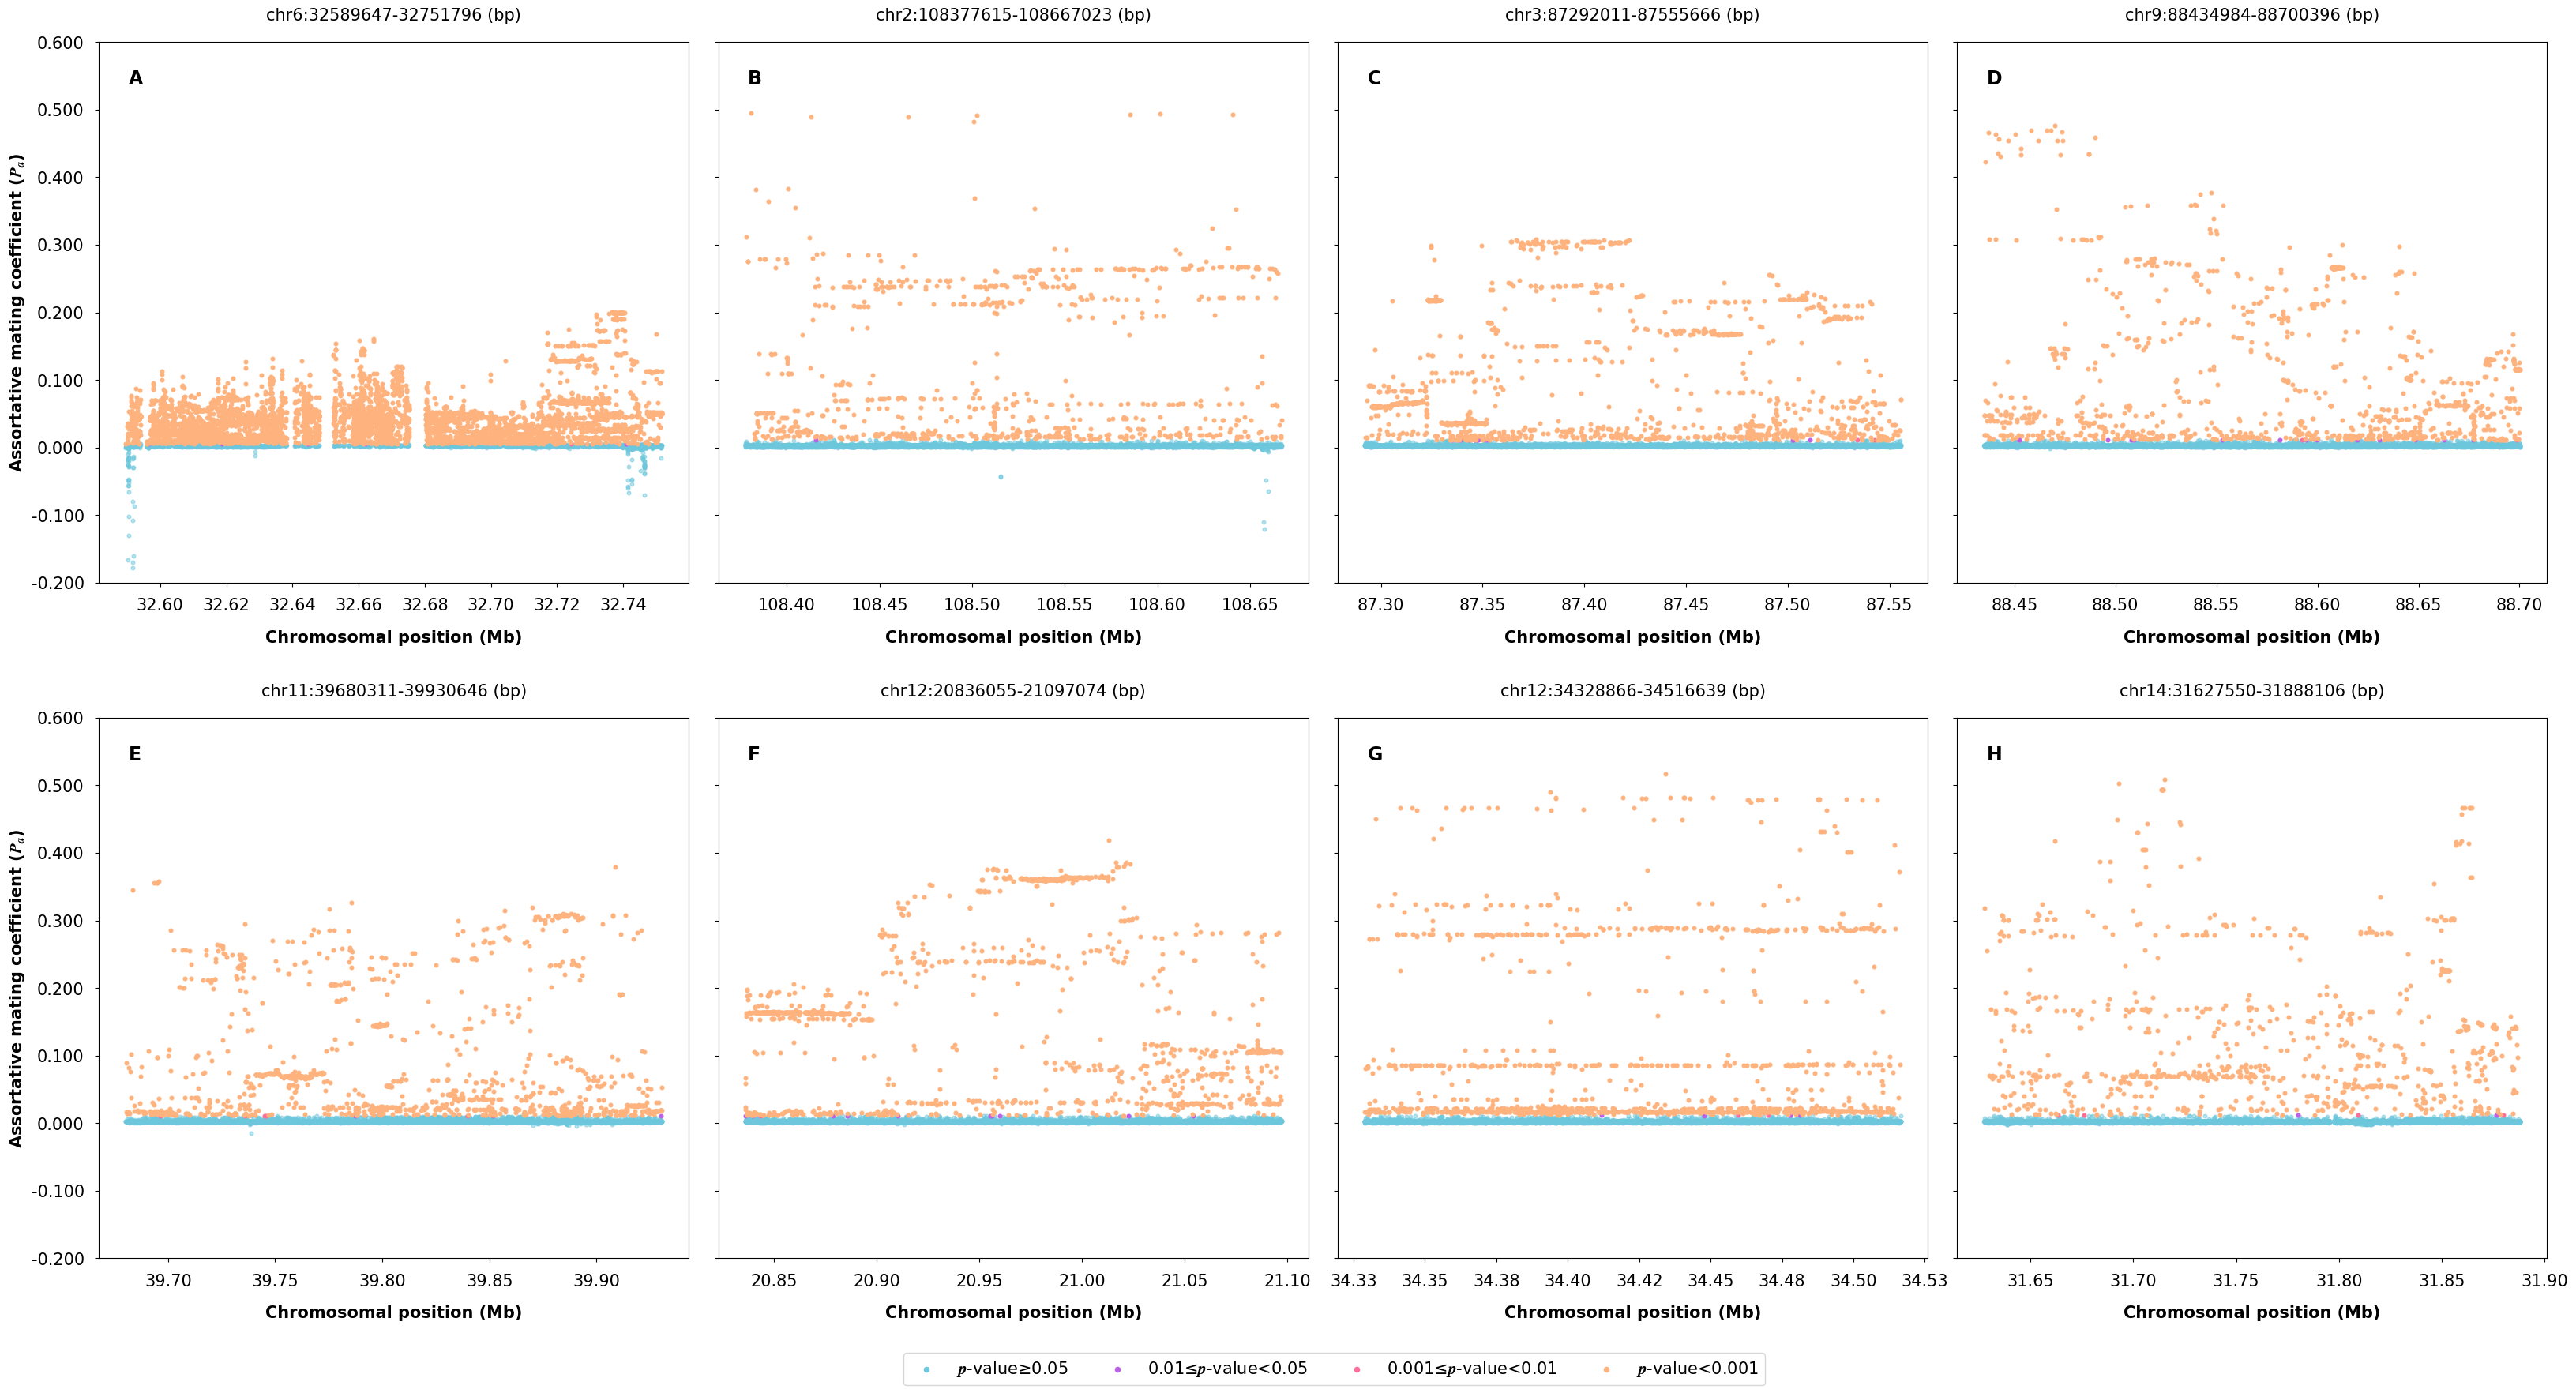

In [35]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
plt.rcParams['font.size'] = 15
plt.rcParams['grid.linewidth'] = 1.2
plt.rcParams['mathtext.default'] = 'it'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.it'] = 'STIXGeneral:italic:bold'
fig, axes = plt.subplots(nrows=2, ncols=4, sharey=True, figsize=(40, 20), facecolor='white')

axes[0,1].scatter(np.array(less_95_xs_chr2)/ 1000000, less_95_ys_chr2, color=less_95, s=11, label="$\mathit{p}$-value≥0.05", alpha=0.5)
axes[0,1].scatter(np.array(from_95_to_99_xs_chr2)/ 1000000, from_95_to_99_ys_chr2, color=from_95_to_99, s=11, label="0.01≤$\mathit{p}$-value<0.05")
axes[0,1].scatter(np.array(from_99_to_999_xs_chr2)/ 1000000, from_99_to_999_ys_chr2, color=from_99_to_999, s=11, label="0.001≤$\mathit{p}$-value<0.01")
axes[0,1].scatter(np.array(larger_than_999_xs_chr2)/ 1000000, larger_than_999_ys_chr2, color=larger_than_999, s=11, label="$\mathit{p}$-value<0.001")
# axes[0].legend(loc="best")
axes[0,1].set_title(f'chr2:108377615-108667023 (bp)',fontsize=15,pad=20)#chr1_xak


# index2 = getmaxindices(Ps1, 1)[0]
# x_max_pos = positions1[index2]/ 1000000
# y_max = Ps1[index2]
# y_max = float(format(y_max, '.5f'))
# # axes[0].text(x_max_pos, y_max, (x_max_pos, y_max), color=larger_than_999, fontsize=12)
# axes[0,0].text(x_max_pos, y_max+0.01, f'(rs1957632615, {r"$P_a$"}={y_max})',color=larger_than_999,fontsize=15, style='italic', weight = 'bold')


axes[0,2].scatter(np.array(less_95_xs_chr3)/ 1000000, less_95_ys_chr3, color=less_95, s=11,label="$\mathit{p}$-value≥0.05", alpha=0.5)
axes[0,2].scatter(np.array(from_95_to_99_xs_chr3)/ 1000000, from_95_to_99_ys_chr3, color=from_95_to_99, s=11,label="0.01≤$\mathit{p}$-value<0.05")
axes[0,2].scatter(np.array(from_99_to_999_xs_chr3)/ 1000000, from_99_to_999_ys_chr3, color=from_99_to_999, s=11,label="0.001≤$\mathit{p}$-value<0.01")
axes[0,2].scatter(np.array(larger_than_999_xs_chr3)/ 1000000, larger_than_999_ys_chr3, color=larger_than_999, s=11,label="$\mathit{p}$-value<0.001")
# legend = axes[1].legend(loc="lower left", bbox_to_anchor=(-0.25, -0.2),ncol=4)
# for lh in legend.legendHandles: 
#     lh.set_alpha(1)
#     lh._sizes = [20] 
#axes[0, 2].label(labels=[r'$\mathbf{B-H}$: Non-MHC Regions'])
axes[0,2].set_title(f'chr3:87292011-87555666 (bp)',fontsize=15,pad=20)#chr1_xak

# index2 = getmaxindices(Ps2, 1)[0]
# x_max_pos = positions2[index2]/ 1000000
# y_max = Ps2[index2]
# y_max = float(format(y_max, '.5f'))
# axes[0,1].text(x_max_pos, y_max+0.01, f'(rs1188100847, {r"$P_a$"}={y_max})',color=larger_than_999,fontsize=15, style='italic', weight = 'bold')


axes[0,3].scatter(np.array(less_95_xs_chr9)/ 1000000, less_95_ys_chr9, color=less_95, s=11,label="$\mathit{p}$-value≥0.05", alpha=0.5)
axes[0,3].scatter(np.array(from_95_to_99_xs_chr9)/ 1000000, from_95_to_99_ys_chr9, color=from_95_to_99, s=11,label="0.01≤$\mathit{p}$-value<0.05")
axes[0,3].scatter(np.array(from_99_to_999_xs_chr9)/ 1000000, from_99_to_999_ys_chr9, color=from_99_to_999, s=11,label="0.001≤$\mathit{p}$-value<0.01")
axes[0,3].scatter(np.array(larger_than_999_xs_chr9)/ 1000000, larger_than_999_ys_chr9, color=larger_than_999, s=11,label="$\mathit{p}$-value<0.001")
# axes[2].legend( loc="best")
axes[0,3].set_title(f'chr9:88434984-88700396 (bp)',fontsize=15,pad=20)#chr1_xak


# index3 = getmaxindices(Ps3, 1)[0]
# x_max_pos = positions3[index3]/ 1000000
# y_max = Ps3[index3]
# y_max = float(format(y_max, '.5f'))
# # axes[2].text(x_max_pos, y_max, (x_max_pos, y_max), color=larger_than_999, fontsize=15)
# axes[0,2].text(x_max_pos, y_max+0.01, f'(rs512442665821, {r"$P_a$"}={y_max})',color=larger_than_999,fontsize=15, style='italic', weight = 'bold')


axes[1,0].scatter(np.array(less_95_xs_chr11)/ 1000000, less_95_ys_chr11, color=less_95, s=11, label="$\mathit{p}$-value≥0.05", alpha=0.5)
axes[1,0].scatter(np.array(from_95_to_99_xs_chr11)/ 1000000, from_95_to_99_ys_chr11, color=from_95_to_99, s=11, label="0.01≤$\mathit{p}$-value<0.05")
axes[1,0].scatter(np.array(from_99_to_999_xs_chr11)/ 1000000, from_99_to_999_ys_chr11, color=from_99_to_999, s=11, label="0.001≤$\mathit{p}$-value<0.01")
axes[1,0].scatter(np.array(larger_than_999_xs_chr11)/ 1000000, larger_than_999_ys_chr11, color=larger_than_999, s=11, label="$\mathit{p}$-value<0.001")
# axes[0].legend(loc="best")
axes[1,0].set_title(f'chr11:39680311-39930646 (bp)',fontsize=15,pad=20)#chr1_xak


# index2 = getmaxindices(Ps4, 1)[0]
# x_max_pos = positions4[index2]/1000000
# y_max = Ps4[index2]
# y_max = float(format(y_max, '.5f'))
# axes[1,0].text(x_max_pos , y_max+0.01,  f'(rs796883451, {r"$P_a$"}={y_max})', color=larger_than_999,fontsize=15, style='italic', weight = 'bold')

axes[1, 1].scatter(np.array(less_95_xs_chr12_a)/ 1000000, less_95_ys_chr12_a, color=less_95, s=11,label="$\mathit{p}$-value≥0.05", alpha=0.5)
axes[1, 1].scatter(np.array(from_95_to_99_xs_chr12_a)/ 1000000, from_95_to_99_ys_chr12_a, color=from_95_to_99, s=11,label="0.01≤$\mathit{p}$-value<0.05")
axes[1, 1].scatter(np.array(from_99_to_999_xs_chr12_a)/ 1000000, from_99_to_999_ys_chr12_a, color=from_99_to_999, s=11,label="0.001≤$\mathit{p}$-value<0.01")
axes[1, 1].scatter(np.array(larger_than_999_xs_chr12_a)/ 1000000, larger_than_999_ys_chr12_a, color=larger_than_999, s=11,label="$\mathit{p}$-value<0.001")
legend = axes[1, 1].legend(loc="lower left", bbox_to_anchor=(0.3, -0.25),ncol=4)
for lh in legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [20] 
axes[1,1].set_title(f'chr12:20836055-21097074 (bp)',fontsize=15,pad=20)#chr1_xak

axes[1, 2].scatter(np.array(less_95_xs_chr12_b)/ 1000000, less_95_ys_chr12_b, color=less_95, s=11,label="$\mathit{p}$-value≥0.05", alpha=0.5)
axes[1, 2].scatter(np.array(from_95_to_99_xs_chr12_b)/ 1000000, from_95_to_99_ys_chr12_b, color=from_95_to_99, s=11,label="0.01≤$\mathit{p}$-value<0.05")
axes[1, 2].scatter(np.array(from_99_to_999_xs_chr12_b)/ 1000000, from_99_to_999_ys_chr12_b, color=from_99_to_999, s=11,label="0.001≤$\mathit{p}$-value<0.01")
axes[1, 2].scatter(np.array(larger_than_999_xs_chr12_b)/ 1000000, larger_than_999_ys_chr12_b, color=larger_than_999, s=11,label="$\mathit{p}$-value<0.001")
# legend = axes[1, 1].legend(loc="center", bbox_to_anchor=(-0.8, -0.25),ncol=4)
# for lh in legend.legendHandles: 
#     lh.set_alpha(1)
#     lh._sizes = [20] 
axes[1,2].set_title(f'chr12:34328866-34516639 (bp)',fontsize=15,pad=20)#chr1_xak


axes[1,3].scatter(np.array(less_95_xs_chr14)/ 1000000, less_95_ys_chr14, color=less_95, s=11, label="$\mathit{p}$-value≥0.05", alpha=0.5)
axes[1,3].scatter(np.array(from_95_to_99_xs_chr14)/ 1000000, from_95_to_99_ys_chr14, color=from_95_to_99, s=11, label="0.01≤$\mathit{p}$-value<0.05")
axes[1,3].scatter(np.array(from_99_to_999_xs_chr14)/ 1000000, from_99_to_999_ys_chr14, color=from_99_to_999, s=11, label="0.001≤$\mathit{p}$-value<0.01")
axes[1,3].scatter(np.array(larger_than_999_xs_chr14)/ 1000000, larger_than_999_ys_chr14, color=larger_than_999, s=11, label="$\mathit{p}$-value<0.001")
# axes[0].legend(loc="best")
axes[1,3].set_title(f'chr14:31627550-31888106 (bp)',fontsize=15,pad=20)#chr1_xak


axes[0,0].scatter(np.array(less_95_xs_mhc)/ 1000000, less_95_ys_mhc, color=less_95, s=11, label="$\mathit{p}$-value≥0.05", alpha=0.5)
axes[0,0].scatter(np.array(from_95_to_99_xs_mhc)/ 1000000, from_95_to_99_ys_mhc, color=from_95_to_99, s=11, label="0.01≤$\mathit{p}$-value<0.05")
axes[0,0].scatter(np.array(from_99_to_999_xs_mhc)/ 1000000, from_99_to_999_ys_mhc, color=from_99_to_999, s=11, label="0.001≤$\mathit{p}$-value<0.01")
axes[0,0].scatter(np.array(larger_than_999_xs_mhc)/ 1000000, larger_than_999_ys_mhc, color=larger_than_999, s=11, label="$\mathit{p}$-value<0.001")
# axes[0].legend(loc="best")
axes[0,0].set_title(f'chr6:32589647-32751796 (bp)',fontsize=15,pad=20)#chr1_xak
#32589647)&(df_mhc_pos_path["Unnamed: 0"]<=32751796

# index2 = getmaxindices(Ps5, 1)[0]
# x_max_pos = positions5[index2]/1000000
# y_max = Ps5[index2]
# y_max = float(format(y_max, '.5f'))
# axes[1, 1].text(x_max_pos, y_max+0.01, f'(rs1281323272, {r"$P_a$"}={y_max})', color=larger_than_999,fontsize=15, style='italic', weight = 'bold')

max_y = 0.600
axes[0,0].set_ylim(-0.200, max_y)
# yticks = np.linspace(-0.25, max_y, num=5)
# axes[0].set_yticks(yticks)


for ax in axes.flatten():
    ax.tick_params(axis='both', which='major', labelsize=15, pad=10)


axes[0,0].set_xlabel("Chromosomal position (Mb)",fontsize=15, weight = 'bold',labelpad=15)
axes[0,0].set_ylabel(r"Assortative mating coefficient ($P_a$)",fontsize=15, weight = 'bold')
# axes[0,0].gca().yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
# axes[0,0].gca().xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axes[0,1].set_xlabel("Chromosomal position (Mb)",fontsize=15, weight = 'bold',labelpad=15)
# axes[0,1].gca().xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axes[0,2].set_xlabel("Chromosomal position (Mb)",fontsize=15, weight = 'bold',labelpad=15)
# axes[0,2].gca().xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axes[0,3].set_xlabel("Chromosomal position (Mb)",fontsize=15, weight = 'bold',labelpad=15)
# axes[0,3].gca().xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axes[1,0].set_ylabel(r"Assortative mating coefficient ($P_a$)",fontsize=15, weight = 'bold')
# axes[1,0].gca().yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
# axes[1,0].gca().xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axes[1,0].set_xlabel("Chromosomal position (Mb)",fontsize=15, weight = 'bold',labelpad=15)
axes[1,1].set_xlabel("Chromosomal position (Mb)",fontsize=15, weight = 'bold',labelpad=15)
#axes[1,1].gca().xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axes[1,2].set_xlabel("Chromosomal position (Mb)",fontsize=15, weight = 'bold',labelpad=15)
#axes[1,2].gca().xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axes[1,3].set_xlabel("Chromosomal position (Mb)",fontsize=15, weight = 'bold',labelpad=15)
#axes[1,3].gca().xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
# fig.suptitle('Positive-assortative mating MHC regions', fontsize=30, y=1)
formatter = ticker.FormatStrFormatter('%.2f')

for ax in axes.flat:
    ax.xaxis.set_major_formatter(formatter)
    
formatter_0 = ticker.FormatStrFormatter('%.3f')
axes[0, 0].yaxis.set_major_formatter(formatter_0)

# 
formatter_1 = ticker.FormatStrFormatter('%.3f')
axes[1, 0].yaxis.set_major_formatter(formatter_1)
# 
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

#
for i, ax in enumerate(axes.flat):
    ax.text(0.05, 0.95, labels[i], transform=ax.transAxes, fontsize=17, fontweight='bold', va='top', ha='left')
   # ax.legend()
    

#ax.legend(["r'$\bf{A}$': MHC Region, r'$\bf{B-H}$': Non-MHC Regions"],prop=font_props)
# # # 添加新的标签到现有的图例
#fig.legend(existing_legend.get_texts() + ['A: mhc', 'B-H: non-mhc'])
#fig.legend(['A: mhc', 'B-H: non-mhc'], loc='upper right

plt.subplots_adjust(wspace=0.05, hspace=0.25)
# 设置y轴刻度为三位小数


plt.savefig('figure2.jpg',dpi=300)
plt.show()



In [36]:
larger_than_999_ys_chr14

[0.3181551489172273,
 0.2550127427421291,
 0.0707961012558314,
 0.168675456699367,
 0.0678797170885741,
 0.0678797170885741,
 0.0656760306305966,
 0.0699182934995556,
 0.0213173452728621,
 0.0694932595300799,
 0.1658664180568526,
 0.162549215902606,
 0.0205719586032344,
 0.0638820261871846,
 0.2808797362678518,
 0.2707457626035257,
 0.0881414601823661,
 0.1215017006390034,
 0.0690542361035144,
 0.2830931740232121,
 0.3076584501826356,
 0.3076584501826356,
 0.3069475762324353,
 0.0696445925121915,
 0.0409052037876827,
 0.3004969117207607,
 0.3001354945061978,
 0.276965811015652,
 0.0236625917070556,
 0.1079998176968471,
 0.0382996675969008,
 0.1926404139886674,
 0.1687176208089364,
 0.0756750744615746,
 0.3001410957985973,
 0.2776603828227096,
 0.0715545815245202,
 0.3001410957985973,
 0.0848259623483034,
 0.0275544597985638,
 0.0415590273070817,
 0.0134901777166223,
 0.1664022298620602,
 0.0687591075465953,
 0.1435011823668032,
 0.1380033588209708,
 0.044520328817812,
 0.16345172257996